In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
digit = keras.datasets.mnist.load_data()

In [3]:
digit # is a tuple containing ((x_train, y_train), (x_test, y_test))

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train), (X_test, y_test) = digit

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [8]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

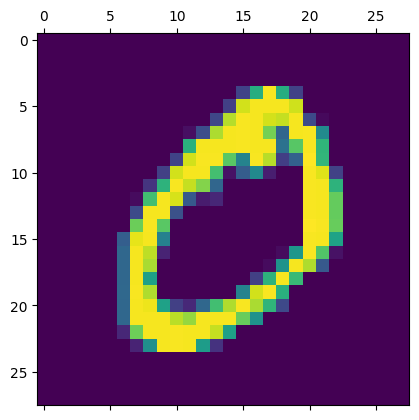

In [9]:
plt.matshow(X_train[1])

### Data Manipulation

In [10]:
X_train_flattened = X_train.reshape(len(X_train),-1)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened = X_test.reshape(len(X_test),-1)
X_test_flattened.shape

(10000, 784)

In [12]:
# Scale
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

### Build Model

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics='accuracy'
)

model.fit(X_train_flattened,y_train, epochs=2)



Epoch 1/2


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4660 - accuracy: 0.8794
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.9148


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2835 - accuracy: 0.9207


[0.2834939956665039, 0.9207000136375427]

In [15]:
yp_test_proba = model.predict(X_test_flattened) # predict in keras resembles predict_proba in sklearn
yp_test_proba.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [16]:
yp_test = np.array([np.argmax(i) for i in yp_test_proba])
yp_test.shape

(10000,)

In [17]:
yp_0_proba = yp_test_proba[0].round(2)
yp_0_proba

array([0.09, 0.  , 0.11, 0.89, 0.01, 0.08, 0.  , 1.  , 0.11, 0.76],
      dtype=float32)

In [18]:
np.argmax(yp_0_proba) # Returns the indices of the maximum values along an axis.

7

<Axes: >

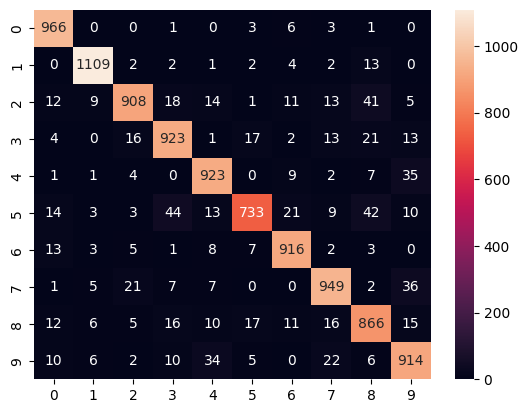

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=yp_test)

sns.heatmap(cm,annot=True,fmt='d')

### Hidden Layer(s)

In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # input_layer = 784, hidden_layer_1 = 100
    keras.layers.Dense(10, activation='sigmoid') # output_layer = 10
])

model2.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics='accuracy'
)

model2.fit(X_train_flattened,y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2722 - accuracy: 0.9228
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1266 - accuracy: 0.9630


In [21]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.1229 - accuracy: 0.9635


[0.12291036546230316, 0.9635000228881836]

In [22]:
yp2_test_proba = model2.predict(X_test_flattened) # predict in keras resembles predict_proba in sklearn
yp2_test = np.array([np.argmax(i) for i in yp2_test_proba])

313/313 [==============================] - 1s 3ms/step


<Axes: >

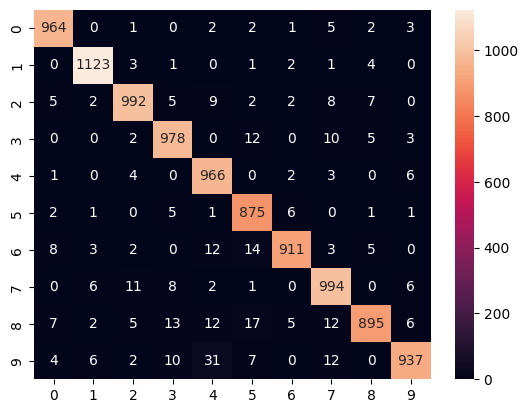

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=yp2_test)

sns.heatmap(cm,annot=True,fmt='d')

### No Need to Flatten first

In [24]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), # input_layer = 784, hidden_layer_1 = 100
    keras.layers.Dense(10, activation='sigmoid') # output_layer = 10
])

model3.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics='accuracy'
)

model3.fit(X_train,y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1759 - accuracy: 0.8286
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4161 - accuracy: 0.8973


In [25]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.9014


[0.46888110041618347, 0.9014000296592712]